<a href="https://colab.research.google.com/github/JUSTYNAYANG/summerpy/blob/main/20230614.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#adding things onto mooncar and then controling them

- read_digital
- write_digital
- read_analog
- write_analog

##(led lights adding on to the moon car) code

- the light is added to pin 3 (where the ultrasound detector is)
- we can know that it is pin 3 by looking at the moon car map

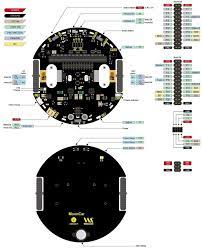

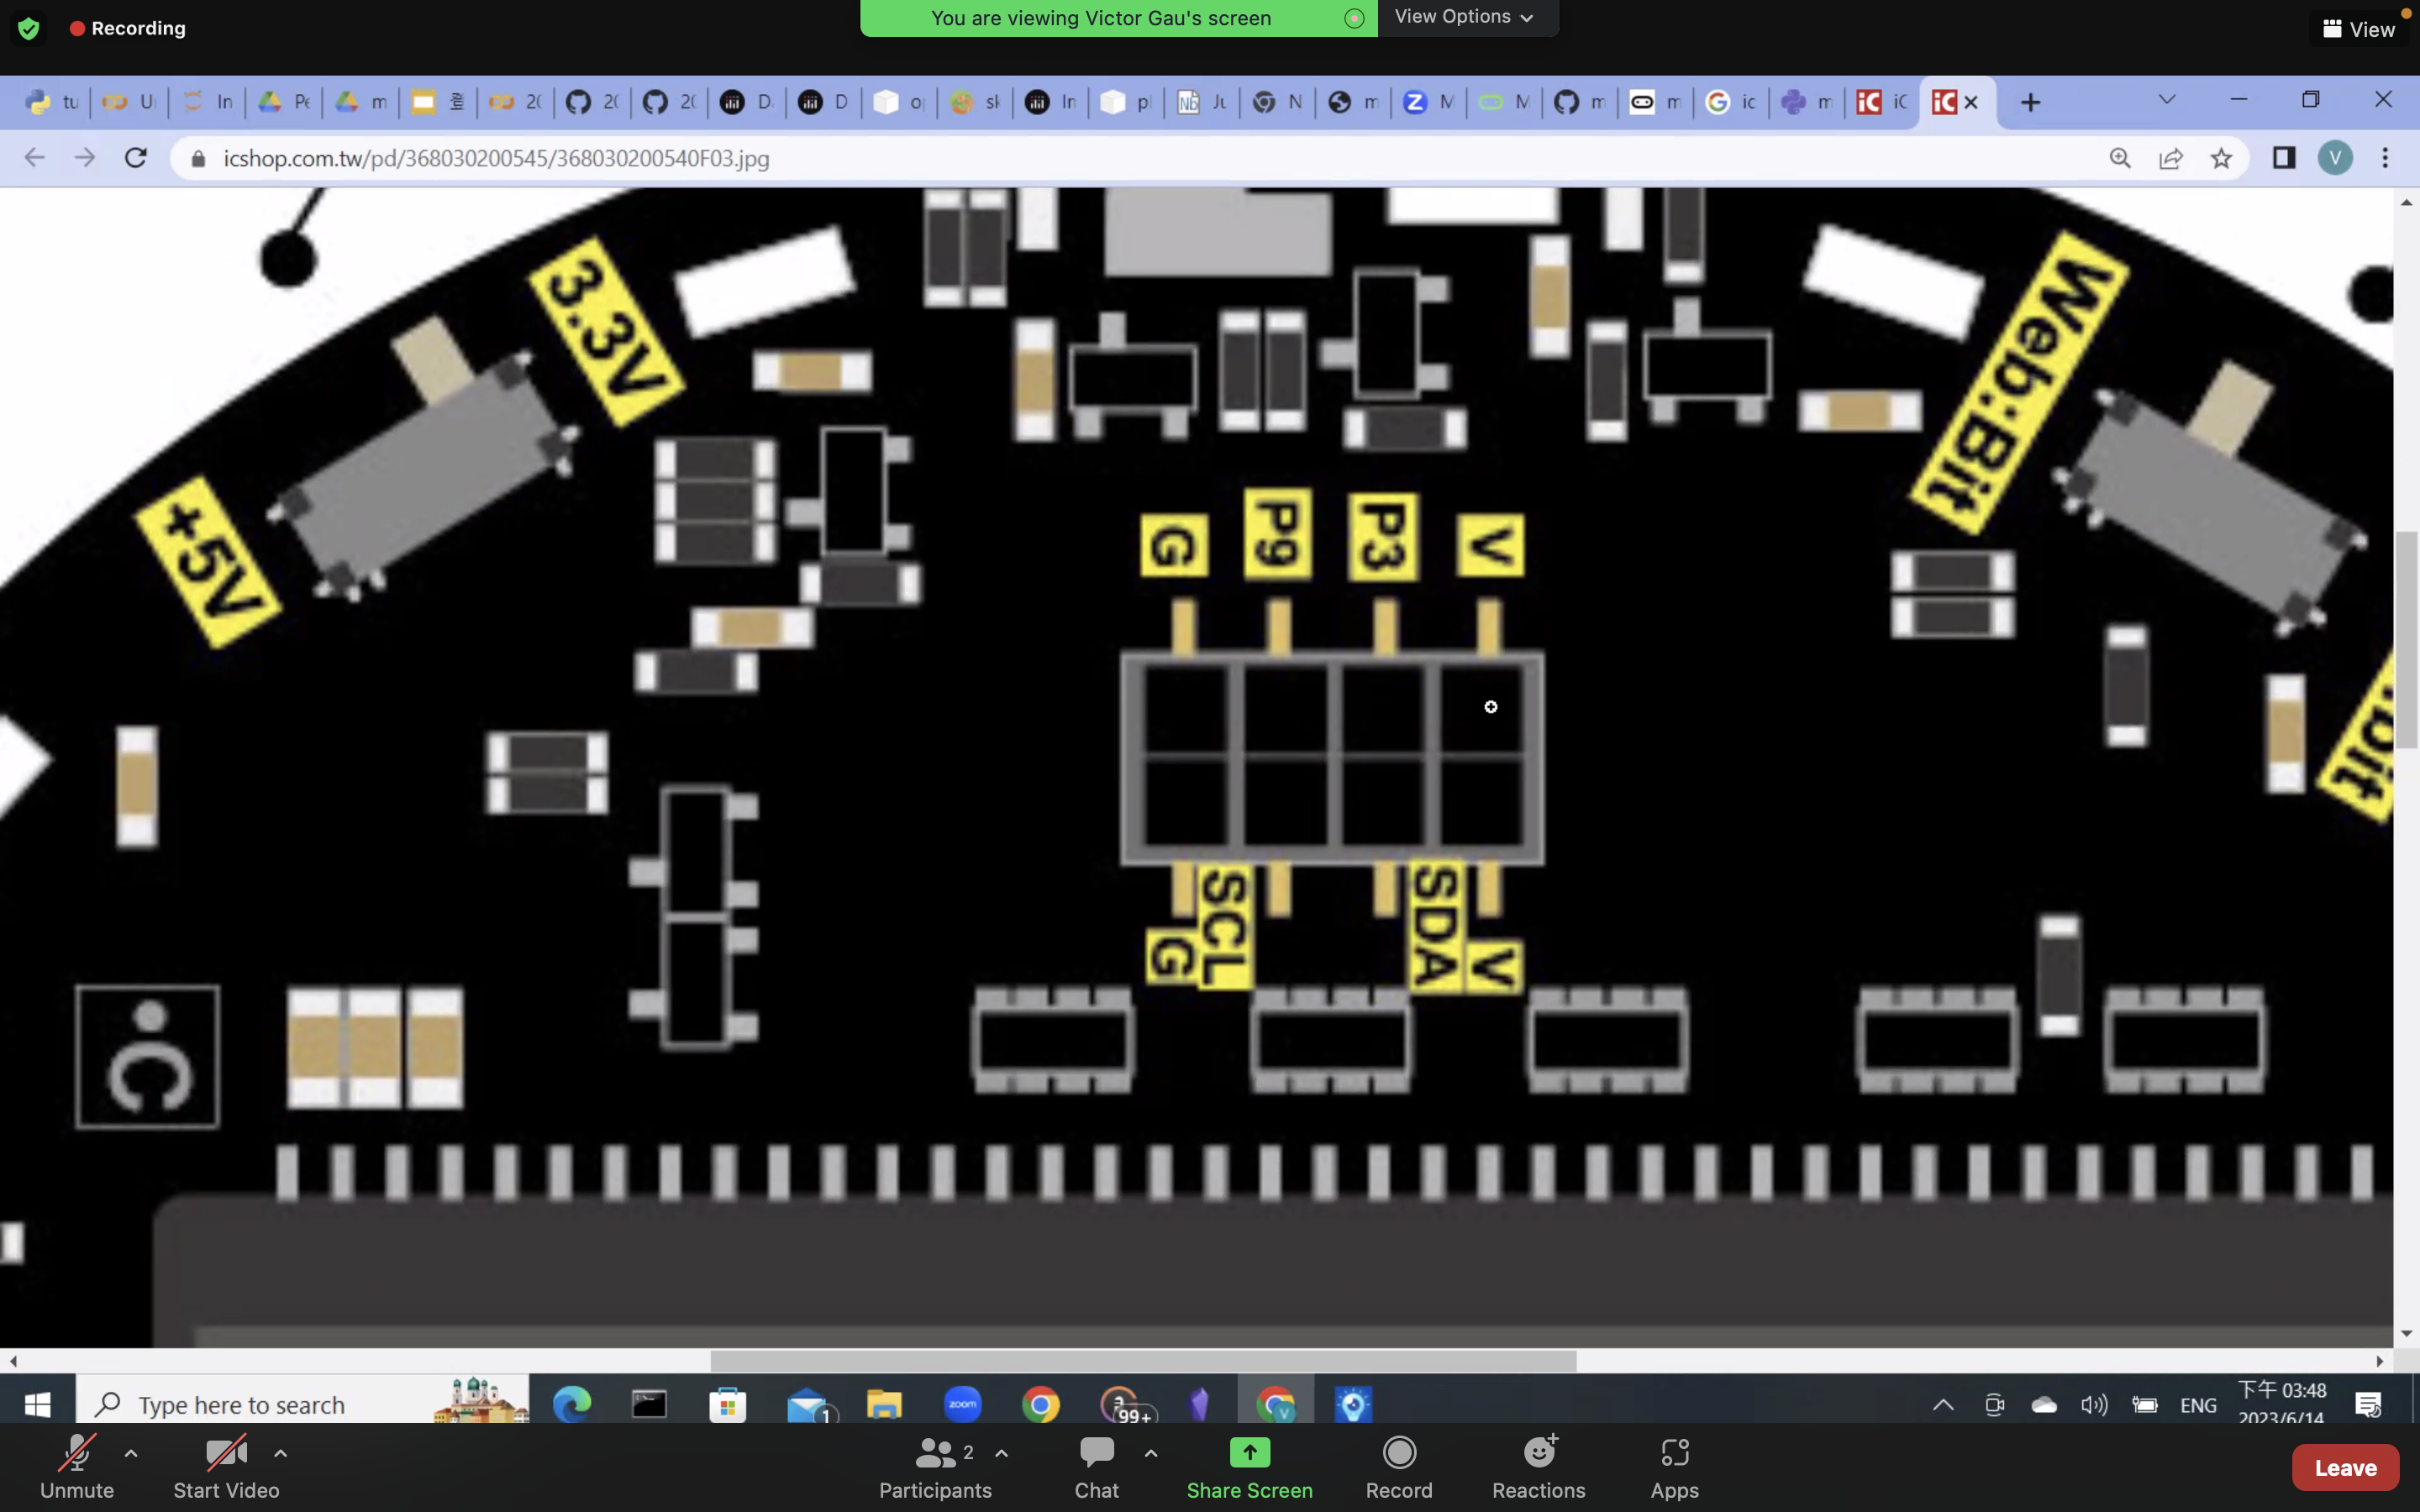

```python
#have the light blink on and off

from microbit import *

# display means microbit 5*5 metrics, so by turning display off we stop using microbit 5*5 metrics
# why: microbit 5*5 metrics also use pin3, if we don't turn display off, then the code will go to the microbit, not to the light
display.off()

while True:
  #send 0 to the light --> turn off light
  pin3.write_digital(0)
  sleep(1000)
  #send 1 to the light --> turn on light
  pin3.write_digital(1)
  sleep(1000)

```

## reviewing ultra sound

```python
#sending out a pulse
pin3.write_digital(1)
pin3.write_digital(0)
```

```python
#calculating the time it took for the pulse to bounce back (echo)
import machine

micros = machine.time_pulse_us(pin9, 1)
```

speed of sound is:
 - 343 m/s
 - 34300 cm/s
 - 343/10000 cm/microseconds

```python
#constantly calculates the distance the mooncar is with the object

from microbit import *

import machine

while True:
    #trigger ultrasound wave (sends a pulse)
    pin3.write_digital(1)
    pin3.write_digital(0)

    #calculates time - cm/microsecond
    micros = machine.time_pulse_us(pin9, 1)

    #velocity
    velo = 343*100/1000000 #cm/microseconds

    #time * velocity = distance
    #it is divided by 2 as the time calculates the distance there and back
    dist = micros /2 * velo
    print(dist)
    sleep(1000)
```

```python
#create a function for it

from microbit import *
import machine

def distance():
    pin3.write_digital(1)
    pin3.write_digital(0)
    micros = machine.time_pulse_us(pin9, 1)
    velo = 343*100/1000000
    dist = micros /2 * velo

```

```python
#trying out the function

from microbit import *

def distance():
    pin3.write_digital(1)
    pin3.write_digital(0)
    micros = machine.time_pulse_us(pin9, 1)
    velo = 343*100/1000000
    dist = micros /2 * velo

while True:
  print(distance())
  sleep(1000)

```

## using modules

```python
#distance.py

def dist():
    pin3.write_digital(1)
    pin3.write_digital(0)
    micros = machine.time_pulse_us(pin9, 1)
    velo = 343*100/1000000

    return micros /2 * velo
```

```python
#lights.py

from microbit import *
import neopixel

np = neopixel.NeoPixel(pin12, 8)

def left_on():
    np[3] = (100, 40, 0) #orangish color
    np[4] = (100, 40, 0) #orangish color
    np.show()

def left_off():
    np[3] = (0, 0, 0)
    np[4] = (0, 0, 0)
    np.show()

def right_on():
    np[0] = (100, 40, 0) #orangish color
    np[7] = (100, 40, 0) #orangish color
    np.show()

def right_off():
    np[0] = (0, 0, 0)
    np[7] = (0, 0, 0)
    np.show()

#v = determines intensity of light
def front_on(v):
    np[1] = (v, v, v) #white
    np[2] = (v, v, v)
    np.show()

def front_off():
    np[1] = (0, 0, 0)
    np[2] = (0, 0, 0)
    np.show()

def back_on(v):
    np[5] = (v, 0, 0) #red
    np[6] = (v, 0, 0)
    np.show()

def back_off():
    np[5] = (0, 0, 0)
    np[6] = (0, 0, 0)
    np.show()

```

```python
#car.py

from microbit import *

#v = speed
def left(v):
    pin2.write_analog(v)
    pin13.write_analog(0)
    pin8.write_analog(0)
    pin14.write_analog(0)

def right(v):
    pin2.write_analog(0)
    pin13.write_analog(0)
    pin8.write_analog(v)
    pin14.write_analog(0)

def forward(v):
    pin2.write_analog(v)
    pin13.write_analog(0)
    pin8.write_analog(v)
    pin14.write_analog(0)

def backward(v):
    pin2.write_analog(0)
    pin13.write_analog(v)
    pin8.write_analog(0)
    pin14.write_analog(v)


def stop():
    pin2.write_analog(0)
    pin13.write_analog(0)
    pin8.write_analog(0)
    pin14.write_analog(0)

```

```python
#making the mooncar turn away from objects that are too close when running

from microbit import *
import distance
import car
import lights


while True:
   if distance.dist() < 50:
      car.backward(200)
      lights.back_on(200)
      car.left(100)
      lights.left_on()
      sleep(300)
   else:
        car.forward(200)
        lights.front_on(200)
        lights.back_off()
        lights.left_off()
```